In [28]:
import pandas as pd 

In [40]:
df = pd.read_csv('Boston.csv')
df.rename(columns={'medv':'House_Price'},inplace=True)
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,House_Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
df=df.drop('Unnamed: 0', axis=1)
df.shape

(506, 14)

In [51]:
input_data  =df.iloc[:,:-1]
output_data = df['House_Price']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test =train_test_split(input_data, output_data,test_size=0.25)

In [60]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape 

((379, 13), (127, 13), (379,), (127,))

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Mean Squared Error: 7.580543354330698
R-squared Score: 0.8920123986319435


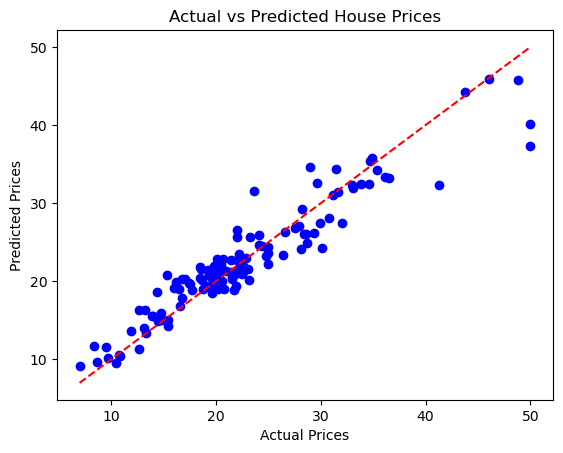

In [72]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.show()



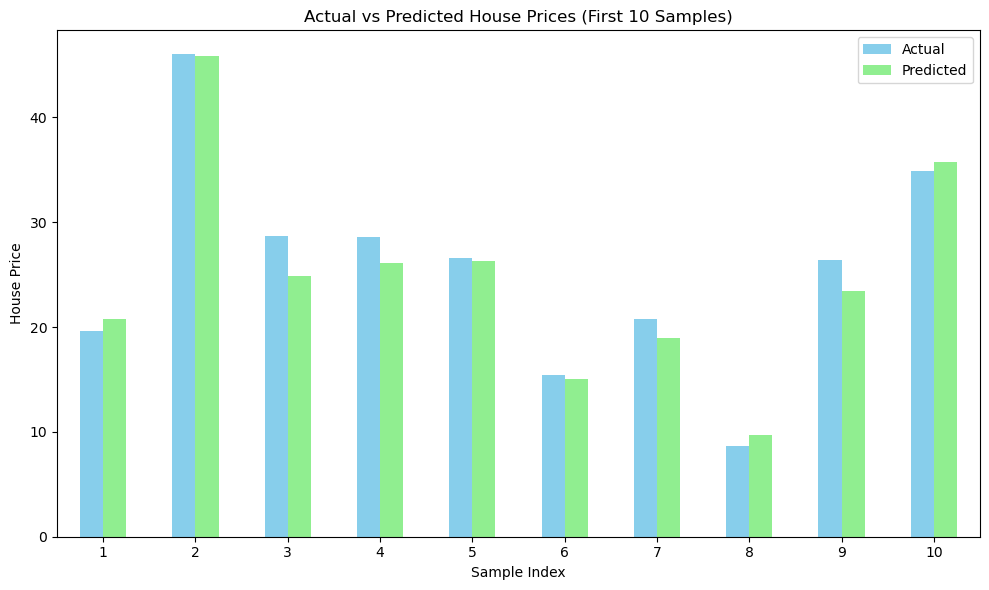

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


result = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})


result.plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen'])
plt.title('Actual vs Predicted House Prices (First 10 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.xticks(np.arange(10), labels=np.arange(1,11), rotation=0)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.show()
